In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).all()
results = results[1:2250]
results

[('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('201

In [13]:
# engine.execute('SELECT date, prcp FROM measurement WHERE measurement.date BETWEEN "2018-02%" AND "2019-02%"').fetchall()

In [14]:
date = [row[0] for row in results]
precip = [row[1] for row in results]

In [15]:
date

['2017-08-23',
 '2017-08-23',
 '2017-08-23',
 '2017-08-22',
 '2017-08-22',
 '2017-08-22',
 '2017-08-21',
 '2017-08-21',
 '2017-08-21',
 '2017-08-21',
 '2017-08-20',
 '2017-08-20',
 '2017-08-20',
 '2017-08-19',
 '2017-08-19',
 '2017-08-19',
 '2017-08-19',
 '2017-08-18',
 '2017-08-18',
 '2017-08-18',
 '2017-08-18',
 '2017-08-17',
 '2017-08-17',
 '2017-08-17',
 '2017-08-17',
 '2017-08-16',
 '2017-08-16',
 '2017-08-16',
 '2017-08-16',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-13',
 '2017-08-13',
 '2017-08-13',
 '2017-08-13',
 '2017-08-13',
 '2017-08-12',
 '2017-08-12',
 '2017-08-12',
 '2017-08-11',
 '2017-08-11',
 '2017-08-11',
 '2017-08-11',
 '2017-08-10',
 '2017-08-10',
 '2017-08-10',
 '2017-08-10',
 '2017-08-09',
 '2017-08-09',
 '2017-08-09',
 '2017-08-08',
 '2017-08-08',
 '2017-08-08',
 '2017-08-08',
 '2017-08-07',
 '2017-08-07',
 '2017-08-07',
 '2017-08-07',
 '2017-08-

In [16]:
data = pd.DataFrame(precip, date)
data['date'] = data.index
data

,0,date
2017-08-23,0.00,2017-08-23
2017-08-23,0.08,2017-08-23
2017-08-23,0.45,2017-08-23
2017-08-22,0.00,2017-08-22
2017-08-22,0.00,2017-08-22
2017-08-22,0.50,2017-08-22
2017-08-21,0.00,2017-08-21
2017-08-21,0.02,2017-08-21
2017-08-21,NaN,2017-08-21
2017-08-21,0.56,2017-08-21


In [17]:
data = data.sort_index()
data

,0,date
2016-08-19,0.14,2016-08-19
2016-08-19,0.04,2016-08-19
2016-08-20,0.13,2016-08-20
2016-08-20,0.00,2016-08-20
2016-08-20,0.00,2016-08-20
2016-08-20,0.03,2016-08-20
2016-08-20,0.00,2016-08-20
2016-08-20,0.20,2016-08-20
2016-08-21,1.08,2016-08-21
2016-08-21,0.08,2016-08-21


In [18]:
grouped_data = data.groupby(data.index).sum()
grouped_data

,0
2016-08-19,0.18
2016-08-20,0.36
2016-08-21,2.01
2016-08-22,5.26
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10


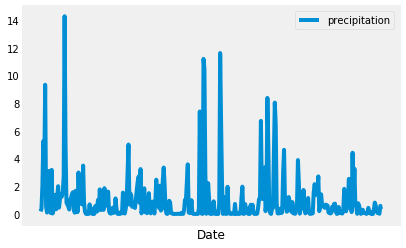

In [19]:
plt.plot(grouped_data, label='precipitation')
plt.legend(loc='best')
plt.grid()
plt.xlabel('Date')
plt.xticks([])
plt.show()

In [20]:
data.describe()

,0
count,2038.000000
mean,0.179632
std,0.463155
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


STATION ANALYSIS 

In [21]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [22]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.id).count()
stations

9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_stats = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.station).all()
station_stats

[(14960, 'USC00511918', '2010-01-01', 0.05, 66.0),
 (14961, 'USC00511918', '2010-01-02', 0.0, 70.0),
 (14962, 'USC00511918', '2010-01-03', 0.0, 75.0),
 (14963, 'USC00511918', '2010-01-04', 0.0, 75.0),
 (14964, 'USC00511918', '2010-01-05', 0.0, 75.0),
 (14965, 'USC00511918', '2010-01-06', 0.08, 72.0),
 (14966, 'USC00511918', '2010-01-07', 0.04, 70.0),
 (14967, 'USC00511918', '2010-01-08', 0.0, 63.0),
 (14968, 'USC00511918', '2010-01-09', 0.0, 68.0),
 (14969, 'USC00511918', '2010-01-10', 0.0, 74.0),
 (14970, 'USC00511918', '2010-01-11', 0.05, 64.0),
 (14971, 'USC00511918', '2010-01-12', 0.0, 57.0),
 (14972, 'USC00511918', '2010-01-13', 0.0, 57.0),
 (14973, 'USC00511918', '2010-01-14', 0.0, 65.0),
 (14974, 'USC00511918', '2010-01-15', 0.0, 56.0),
 (14975, 'USC00511918', '2010-01-16', 0.0, 66.0),
 (14976, 'USC00511918', '2010-01-18', 0.0, 73.0),
 (14977, 'USC00511918', '2010-01-19', 0.0, 61.0),
 (14978, 'USC00511918', '2010-01-20', 0.0, 66.0),
 (14979, 'USC00511918', '2010-01-21', 0.0, 68.

In [24]:
id = [row[0] for row in station_stats]
station = [row[1] for row in station_stats]
date = [row[2] for row in station_stats]
precip = [row[3] for row in station_stats]
tobs = [row[4] for row in station_stats]

In [25]:
station_data = pd.DataFrame(id, station)
station_data = station_data.groupby(station_data.index).count()
station_data = station_data.rename(columns={'0':'Activity'})
station_data

,0
USC00511918,1979
USC00513117,2709
USC00514830,2202
USC00516128,2612
USC00517948,1372
USC00518838,511
USC00519281,2772
USC00519397,2724
USC00519523,2669


In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_min_max_avg = engine.execute('SELECT measurement.station, measurement.prcp, measurement.tobs FROM measurement WHERE measurement.station = "USC00519281"').fetchall()
station_min_max_avg

[('USC00519281', 0.15, 70.0),
 ('USC00519281', 0.0, 62.0),
 ('USC00519281', 0.0, 74.0),
 ('USC00519281', 0.0, 75.0),
 ('USC00519281', 0.0, 74.0),
 ('USC00519281', 0.01, 76.0),
 ('USC00519281', 0.17, 69.0),
 ('USC00519281', 0.0, 66.0),
 ('USC00519281', 0.0, 70.0),
 ('USC00519281', 0.0, 75.0),
 ('USC00519281', 0.03, 64.0),
 ('USC00519281', 0.0, 60.0),
 ('USC00519281', 0.0, 61.0),
 ('USC00519281', 0.0, 68.0),
 ('USC00519281', 0.0, 64.0),
 ('USC00519281', 0.0, 66.0),
 ('USC00519281', 0.0, 67.0),
 ('USC00519281', 0.0, 70.0),
 ('USC00519281', 0.0, 67.0),
 ('USC00519281', 0.0, 67.0),
 ('USC00519281', 0.16, 69.0),
 ('USC00519281', 0.0, 60.0),
 ('USC00519281', 0.0, 75.0),
 ('USC00519281', 0.0, 75.0),
 ('USC00519281', 0.0, 65.0),
 ('USC00519281', 0.01, 75.0),
 ('USC00519281', 0.31, 69.0),
 ('USC00519281', 0.37, 67.0),
 ('USC00519281', 0.75, 66.0),
 ('USC00519281', 2.17, 69.0),
 ('USC00519281', 0.69, 72.0),
 ('USC00519281', 0.02, 67.0),
 ('USC00519281', 0.0, 65.0),
 ('USC00519281', 0.37, 64.0),
 

In [27]:
station1 = [row[0] for row in station_min_max_avg]
precip1 = [row[1] for row in station_min_max_avg]
tobs1 = [row[2] for row in station_min_max_avg]

In [28]:
station_stats = pd.DataFrame(precip1, tobs1)
station_stats

,0
70.0,0.15
62.0,0.00
74.0,0.00
75.0,0.00
74.0,0.00
76.0,0.01
69.0,0.17
66.0,0.00
70.0,0.00
75.0,0.00


In [29]:
station_stats['temp'] = station_stats.index
station_stats

,0,temp
70.0,0.15,70.0
62.0,0.00,62.0
74.0,0.00,74.0
75.0,0.00,75.0
74.0,0.00,74.0
76.0,0.01,76.0
69.0,0.17,69.0
66.0,0.00,66.0
70.0,0.00,70.0
75.0,0.00,75.0


In [30]:
station_min = min(station_stats['temp'])
station_min

54.0

In [31]:
station_max = max(station_stats['temp'])
station_max

85.0

In [32]:
station_avg = station_stats['temp'].mean()
station_avg

71.66378066378067

In [41]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# The station with the most temperature observations is the same station as the most active station, 
# which we found above. Therefore, I'm just renaming that dataframe so I can work with it for this upcoming question. 

temp_station = station_min_max_avg
len(temp_station)

2772

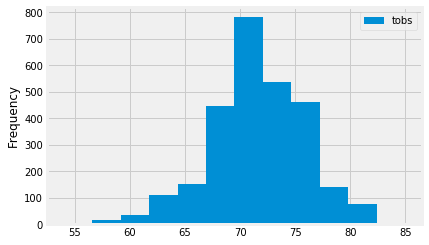

In [46]:
labels= ['tobs']

plt.hist(tobs1, bins=12)
plt.ylabel('Frequency')
plt.legend(labels)
plt.show()

In [47]:
start_date = '2017-07-08'
end_date = '2017-07-15'

In [52]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    
    
#    """TMIN, TAVG, and TMAX for a list of dates.
    
#    Args:
        #start_date (string): A date string in the format %Y-%m-%d
        #end_date (string): A date string in the format %Y-%m-%d
        
   # Returns:
    #TMIN, TAVE, and TMAX
    #"""
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps(start_date, end_date))

[(69.0, 78.3076923076923, 82.0)]


In [53]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
help(calc_temps)

Help on function calc_temps in module __main__:

calc_temps(start_date, end_date)
    # This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
    # and return the minimum, average, and maximum temperatures for that range of dates



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\Jason\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\Jason\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
